In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import cm
from matplotlib.lines import Line2D
import seaborn as sns
import numpy as np

C:\Users\tanth\Anaconda3\envs\maclearning\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
excel_raw_df = pd.read_excel('Job Applications 2019-2020.xlsx', header=1)

In [3]:
excel_raw_df.head()

,Date,Country,Company,Position,Follow-Up,Online,On-Site,Virtual,Phone,Video,...,No Reply,Rejected,Stopped Pursuing,Superceded,Offer,Offer Accepted,End Date,Process Duration (Days),Days Since Application,Outstanding Work
0,2019-12-28,Malaysia,Accenture,Consulting Analyst,x,NaN,NaN,x,x,NaN,...,NaN,NaN,x,NaN,NaN,NaN,2020-02-20,54.0,NaN,NaN
1,2019-12-28,Malaysia,Accenture,Software Engineering Analyst,NaN,NaN,NaN,x,NaN,NaN,...,NaN,NaN,x,NaN,NaN,NaN,2020-02-20,54.0,NaN,NaN
2,2019-12-28,Malaysia,Accenture,ASEAN Accenture Strategy Graduate,NaN,NaN,NaN,NaN,NaN,NaN,...,x,NaN,NaN,NaN,NaN,NaN,NaT,NaN,55.0,NaN
3,2019-12-28,Singapore,Accenture,Accenture Graduate Opportunities,NaN,NaN,NaN,x,NaN,NaN,...,NaN,x,NaN,NaN,NaN,NaN,2020-01-07,10.0,NaN,NaN
4,2019-12-28,Malaysia,Astro,Astro Graduate Programme - Technology Stream,NaN,NaN,NaN,NaN,NaN,NaN,...,x,NaN,NaN,NaN,NaN,NaN,NaT,NaN,55.0,NaN


In [4]:
excel_raw_df.dtypes

Date                       datetime64[ns]
Country                            object
Company                            object
Position                           object
Follow-Up                          object
Online                             object
On-Site                            object
Virtual                            object
Phone                              object
Video                              object
On-Site2                           object
No Reply                           object
Rejected                           object
Stopped Pursuing                   object
Superceded                         object
Offer                              object
Offer Accepted                     object
End Date                   datetime64[ns]
Process Duration (Days)           float64
Days Since Application            float64
Outstanding Work                  float64
dtype: object

In [5]:
excel_df = excel_raw_df.rename(columns={'Follow-Up':'Follow-Up Email/Call',
                                        'Online':'Online Assessment',
                                        'On-Site':'On-Site Assessment',
                                        'Virtual':'Virtual Interview',
                                        'Phone':'Phone Interview',
                                        'Video':'Video Interview',
                                        'On-Site2':'On-Site Interview'})
excel_df.drop('Outstanding Work', axis=1, inplace=True)
excel_df.head()

,Date,Country,Company,Position,Follow-Up Email/Call,Online Assessment,On-Site Assessment,Virtual Interview,Phone Interview,Video Interview,On-Site Interview,No Reply,Rejected,Stopped Pursuing,Superceded,Offer,Offer Accepted,End Date,Process Duration (Days),Days Since Application
0,2019-12-28,Malaysia,Accenture,Consulting Analyst,x,NaN,NaN,x,x,NaN,NaN,NaN,NaN,x,NaN,NaN,NaN,2020-02-20,54.0,NaN
1,2019-12-28,Malaysia,Accenture,Software Engineering Analyst,NaN,NaN,NaN,x,NaN,NaN,NaN,NaN,NaN,x,NaN,NaN,NaN,2020-02-20,54.0,NaN
2,2019-12-28,Malaysia,Accenture,ASEAN Accenture Strategy Graduate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,x,NaN,NaN,NaN,NaN,NaN,NaT,NaN,55.0
3,2019-12-28,Singapore,Accenture,Accenture Graduate Opportunities,NaN,NaN,NaN,x,NaN,NaN,NaN,NaN,x,NaN,NaN,NaN,NaN,2020-01-07,10.0,NaN
4,2019-12-28,Malaysia,Astro,Astro Graduate Programme - Technology Stream,NaN,NaN,NaN,NaN,NaN,NaN,NaN,x,NaN,NaN,NaN,NaN,NaN,NaT,NaN,55.0


In [6]:
companies_df = excel_df.groupby(['Company','Country']).count()
companies_df.head(10)

Date  Position  Follow-Up Email/Call  \
Company           Country                                           
Accenture         Malaysia      4         4                     1   
                  Singapore     1         1                     0   
Astro             Malaysia      1         1                     0   
Axiata            Malaysia      1         1                     0   
CIMB              Malaysia      1         1                     0   
Cisco             Malaysia      1         1                     0   
Cognizant         Malaysia      1         1                     0   
                  Singapore     1         1                     0   
Dassault Systemes Malaysia      2         2                     1   
Deloitte          Malaysia      1         1                     0   

                             Online Assessment  On-Site Assessment  \
Company           Country                                            
Accenture         Malaysia                   0                   0   
                  Singapore                  0                   0   
Astro             Malaysia                   0                   0   
Axiata            Malaysia                   0                   0   
CIMB              Malaysia                   1                   0   
Cisco             Malaysia                   0                   0   
Cognizant         Malaysia                   1                   0   
                  Singapore                  0                   0   
Dassault Systemes Malaysia                   1                   1   
Deloitte          Malaysia                   0                   0   

                             Virtual Interview  Phone Interview  \
Company           Country                                         
Accenture         Malaysia                   3                1   
                  Singapore                  1                0   
Astro             Malaysia                   0                0   
Axiata            Malaysia                   0                0   
CIMB              Malaysia                   0                0   
Cisco             Malaysia                   1                0   
Cognizant         Malaysia                   0                0   
                  Singapore                  0                0   
Dassault Systemes Malaysia                   0                1   
Deloitte          Malaysia                   0                0   

                             Video Interview  On-Site Interview  No Reply  \
Company           Country                                                   
Accenture         Malaysia                 0                  0         1   
                  Singapore                0                  0         0   
Astro             Malaysia                 0                  0         1   
Axiata            Malaysia                 0                  0         1   
CIMB              Malaysia                 0                  0         1   
Cisco             Malaysia                 0                  0         0   
Cognizant         Malaysia                 0                  0         1   
                  Singapore                0                  0         1   
Dassault Systemes Malaysia                 0                  0         0   
Deloitte          Malaysia                 0                  0         1   

                             Rejected  Stopped Pursuing  Superceded  Offer  \
Company           Country                                                    
Accenture         Malaysia          0                 3           0      0   
                  Singapore         1                 0           0      0   
Astro             Malaysia          0                 0           0      0   
Axiata            Malaysia          0                 0           0      0   
CIMB              Malaysia          0                 0           0      0   
Cisco             Malaysia          0                 1           0      0   
Cogni

In [7]:
companies_total = companies_df.shape[0]
applications_total = excel_df.shape[0]
print(f'Total applications sent: {applications_total}\nTotal companies applied to: {companies_total}')

Total applications sent: 29
Total companies applied to: 23


In [23]:
outcome_cols = ['No Reply','Superceded','Stopped Pursuing','Rejected','Offer','Offer Accepted']
time_df = excel_df[['Date','End Date','Process Duration (Days)'] + outcome_cols]
time_df.sort_values(by=['Date'] + outcome_cols , inplace=True)
time_df.head(10)

C:\Users\tanth\Anaconda3\envs\maclearning\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Date,End Date,Process Duration (Days),No Reply,Superceded,Stopped Pursuing,Rejected,Offer,Offer Accepted
2,2019-12-28,NaT,NaN,x,NaN,NaN,NaN,NaN,NaN
4,2019-12-28,NaT,NaN,x,NaN,NaN,NaN,NaN,NaN
7,2019-12-28,NaT,NaN,x,NaN,NaN,NaN,NaN,NaN
5,2019-12-28,2020-01-17,20.0,NaN,x,NaN,NaN,NaN,NaN
0,2019-12-28,2020-02-20,54.0,NaN,NaN,x,NaN,NaN,NaN
1,2019-12-28,2020-02-20,54.0,NaN,NaN,x,NaN,NaN,NaN
8,2019-12-28,2020-02-20,54.0,NaN,NaN,x,NaN,NaN,NaN
3,2019-12-28,2020-01-07,10.0,NaN,NaN,NaN,x,NaN,NaN
6,2019-12-28,2020-02-13,47.0,NaN,NaN,NaN,NaN,x,NaN
9,2019-12-29,NaT,NaN,x,NaN,NaN,NaN,NaN,NaN


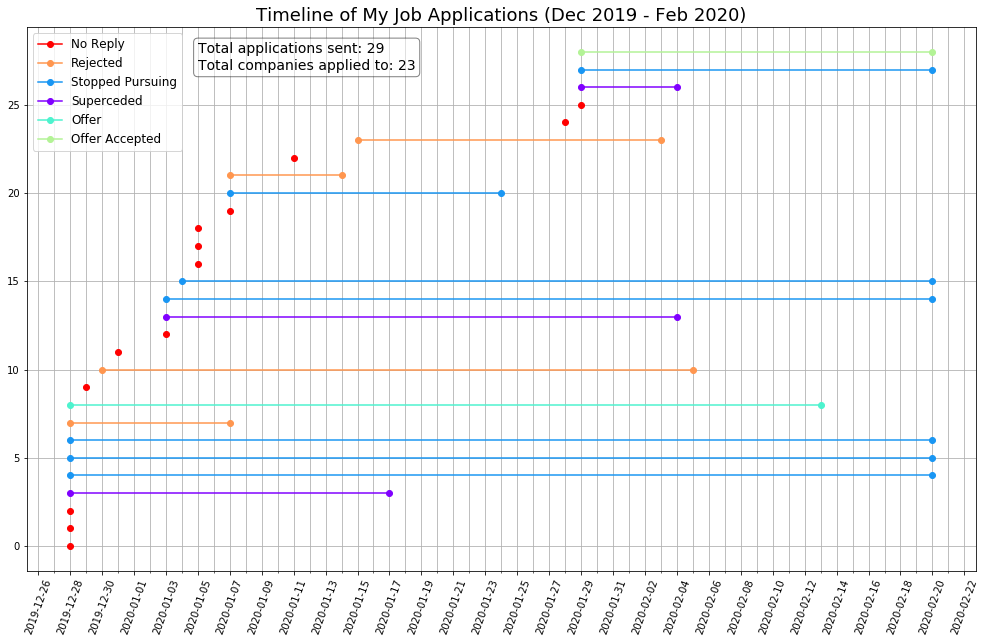

In [9]:
fig, ax = plt.subplots(1,1, figsize=(17,10))

cmap = cm.get_cmap('rainbow', len(outcome_cols))

for count, date, index in zip(range(len(time_df.index)), time_df['Date'], time_df.index):
    if time_df.loc[index, 'Superceded'] == 'x':
        color_index = 0
    elif time_df.loc[index, 'Stopped Pursuing'] == 'x':
        color_index = 1
    elif time_df.loc[index, 'Offer'] == 'x' and time_df.loc[index, 'Offer Accepted'] != 'x':
        color_index = 2
    elif time_df.loc[index, 'Offer Accepted'] == 'x':
        color_index = 3
    elif time_df.loc[index, 'Rejected'] == 'x':
        color_index = 4
    else:
        ax.plot_date(date, count, marker='o', color=cmap(5))
        continue
    
    ax.plot_date(date, count, color=cmap(color_index))
    ax.plot_date(time_df.loc[index, 'End Date'], count, color=cmap(color_index))
    ax.plot([date, time_df.loc[index, 'End Date']], [count]*2, color=cmap(color_index))
    
    
plt.setp(ax.xaxis.get_majorticklabels(), rotation=70)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=2))
ax.xaxis.set_minor_locator(mdates.DayLocator(interval=1))
ax.grid(which='both')

color_index_seq = [5,4,1,0,2,3]
legend_elements = [Line2D([0], [0], marker='o', color=cmap(color_index)) for color_index in color_index_seq]
legend_labels = ['No Reply','Rejected','Stopped Pursuing','Superceded','Offer','Offer Accepted']
ax.legend(legend_elements, legend_labels, fontsize=12)
ax.set_title('Timeline of My Job Applications (Dec 2019 - Feb 2020)', fontsize=18)

props = dict(boxstyle='round', facecolor='white', alpha=0.5)
plt.text(time_df.loc[16,'Date'], 27, 
         f'Total applications sent: {applications_total}\nTotal companies applied to: {companies_total}', 
         fontsize=14, bbox=props)

plt.show()

In [30]:
counts = companies_df.sum(axis=0)
outcome_counts = count_df[outcome_cols]
outcome_counts

No Reply            13
Superceded           3
Stopped Pursuing     7
Rejected             4
Offer                2
Offer Accepted       1
dtype: int64

In [72]:
method_cols = ['Online Assessment',
               'On-Site Assessment',
               'Virtual Interview',
               'Phone Interview',
               'Video Interview',
               'On-Site Interview'
              ]

method_df = companies_df[method_cols]

for method_col in method_cols:
    method_df.loc[method_df[method_col] > 1, method_col] = 1

method_counts = method_df.sum()
method_counts

Online Assessment     5
On-Site Assessment    2
Virtual Interview     4
Phone Interview       4
Video Interview       1
On-Site Interview     1
dtype: int64